In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wingrad.tensor import Tensor
from wingrad.net import MLP
from sklearn.datasets import make_moons

In [2]:
# configure data
X, y = make_moons(n_samples=400, noise=0.08)

# make y either -1 or 1
y = y*2 - 1

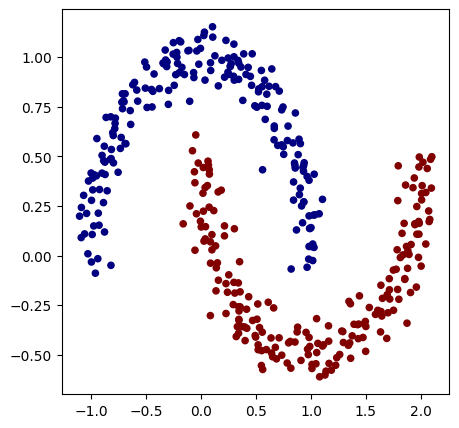

In [3]:
# visualize the data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='jet')
plt.show()  

In [4]:
# reshape data
X = X.T
y = y.reshape(400, 1).T

In [5]:
# training examples and labels
inputs = [X[:, i].reshape(2, 1) for i in range(X.shape[1])]    # list of 100 inputs with shape (2, 1)
labels = [y[:, i].reshape(1, 1) for i in range(y.shape[1])]    # list of 100 labels with shape (1, 1)

In [6]:
# initialize a model
model = MLP(2, [16, 1])

In [7]:
# training loop
for k in range(200):

    epochs = 200

    # forward pass
    pred = [model(x) for x in inputs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(labels, pred)])
    accuracy = [(yi > 0) == (predi.data > 0) for yi, predi in zip(labels, pred)]
    acc = sum(accuracy) / len(accuracy)

    # zero out gradients before backward pass
    model.zero_grad()

    # backward pass
    loss.backward()

    # update parameters
    for p in model.parameters():
        p.data -= 0.009 * p.grad

    # print the step, loss, and accuracy on that step 10 times througout training
    num_prints = 10 if epochs >= 10 else epochs
    if (k % (epochs // num_prints) == 0 or k == epochs-1):
        print(f"step {k}, loss: {loss.data[0][0]}, accuracy: {acc[0][0]*100}%")

step 0, loss: 167.93166239589962, accuracy: 84.75%
step 20, loss: 202.9645214497548, accuracy: 86.0%
step 40, loss: 193.41467798286834, accuracy: 87.25%
step 60, loss: 98.73394928161557, accuracy: 93.0%
step 80, loss: 2.1619743906749496, accuracy: 100.0%
step 100, loss: 0.7702999616525417, accuracy: 100.0%
step 120, loss: 0.5818992666980668, accuracy: 100.0%
step 140, loss: 0.4690307537420658, accuracy: 100.0%
step 160, loss: 0.39227481354357574, accuracy: 100.0%
step 180, loss: 0.336800200253306, accuracy: 100.0%
step 199, loss: 0.29683974588680895, accuracy: 100.0%


In [8]:
# Visualize the decision boundary
h = 0.01  # Step size for the meshgrid
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_mesh = np.c_[xx.ravel(), yy.ravel()]  # Flatten meshgrid coordinates
inputs = [Tensor(xrow).reshape((2, 1)) for xrow in X_mesh]
scores = [model(x).data > 0 for x in inputs]  # Predict scores for each point
Z = np.array(scores).reshape(xx.shape)

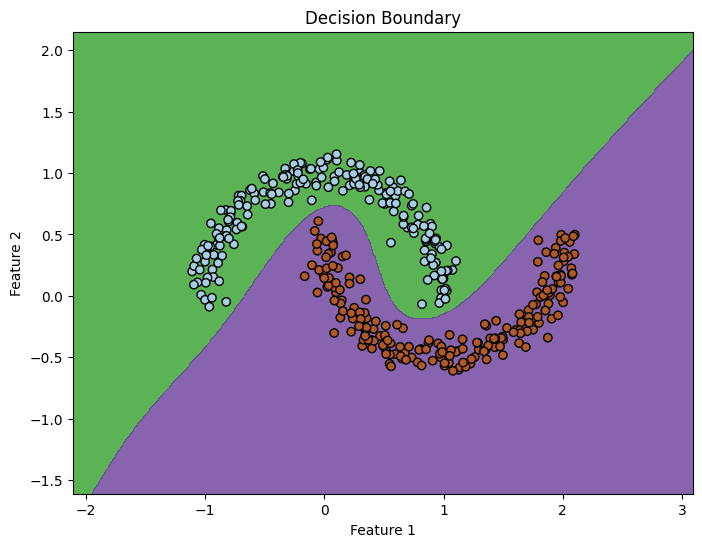

In [9]:
# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()